In [185]:
import numpy as np
import matplotlib.pyplot as plt



In [21]:
def num2sign(num, dim=10):
    return np.array([ 1 if (num >> _) & 0x01 == 1 else -1 for _ in range(dim-1,-1, -1)])

In [279]:
def get_target(num, dim, is_same=False):
    if is_same:
        return num2sign(num, dim)
    else:
        return num2sign(num, dim) * np.random.rand(dim)

class Oracle(object):
    def __init__(self, dim):
        self.dim = dim
        self.target = None
        self.set_target(0)
        
    def set_target(self, num, is_same=True):
        self.target = get_target(num, self.dim, is_same=is_same)
    
    def eval_query(self, query):
        return query.dot(self.target)
    
    def stop_crit(self, query):
        #print(self.target.shape)
        #print(query.shape)
        #print( np.sum(np.sign(self.target) == query))
        return np.sum(np.sign(self.target) == query) >= 0.65 * dim
    

In [280]:
def guess_target(f, stop_crit, dim, method='naive'):
    best_guess = np.ones(dim)
    best_f = f(best_guess)
    guess = np.ones(dim)
    num_queries = 1
    if method == 'naive':
        for _ in range(dim):
            #print(_, best_guess)
            if stop_crit(best_guess):
                return num_queries
            guess[_] *= -1
            val = f(guess)
            num_queries += 1
            if val > best_f:
                best_guess = guess.copy()
            else:
                guess = best_guess.copy()
    elif method == 'hunter':
        for h in range(np.ceil(np.log2(dim)).astype(int) + 1):
            #print(h)
            chunk_len = np.ceil(dim / 2**h).astype(int)
            for i in range(2**h):
                istart = i * chunk_len
                iend = min(istart + chunk_len, dim)
                #print(stop_crit(best_guess))
                if stop_crit(best_guess):
                    return num_queries
                guess[istart:iend] *= -1
                val = f(guess)
                num_queries += 1
                if val >= best_f:
                    #print("guess is better", istart, iend, best_guess, guess)
                    best_guess = guess.copy()
                else:
                    #print("guess is worse", istart, iend, best_guess, guess)
                    guess = best_guess.copy()
                if iend == dim:
                    break
        #print(best_guess)
    return num_queries
                

In [281]:
dims = [15]
naive_total_queries = []
hunter_total_queries = []
for dim in dims:
    oracle = Oracle(dim)
    naive_total_queries.append([])
    hunter_total_queries.append([])
    for i in range(2**dim):
        oracle.set_target(i, is_same=True)
        target = oracle.target
        #print(target)
        f = lambda _: oracle.eval_query(_)
        stop_crit = lambda _: oracle.stop_crit(_)
        naive_total_queries[-1].append(guess_target(f, stop_crit, dim, method='naive'))
        hunter_total_queries[-1].append(guess_target(f, stop_crit, dim, method='hunter'))
    #naive_total_queries[-1] /= 2**dim
    #hunter_total_queries[-1] /= 2**dim
        
        
        

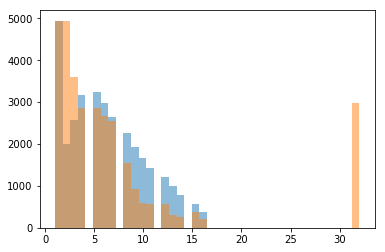

In [282]:

bins=np.histogram(np.hstack((naive_total_queries,hunter_total_queries)), bins=40)[1]
_ = plt.hist(naive_total_queries,bins, alpha = 0.5)
_ = plt.hist(hunter_total_queries, bins, alpha = 0.5)

In [283]:
hunter_total_queries, naive_total_queries

([[2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   2,
   2,
   2,
   4,
   2,
   4,
   4,
   4,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   2,
   4,
   2,
   2,
   2,
   2,
   2,
   2,
   2